# Access to Dental Care in California

# Do Californian's in a certain poverty rate or a particular income per capita group have better or worse access to a dentist than another group?

In [42]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
census_data_to_load = "C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Project #1/Project-1/Data/project data/census_data_ca.csv"
dental_providers_to_load = "C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Project #1/Project-1/Data/project data/dental_provider_network_ca.csv"
zipcode_distance_time_to_providers_to_load = "C:/Users/ca25935/Desktop/UCD Data Analytics/Homework/Project #1/Project-1/Data/project data/zipcode_distance_time_to_providers.csv"

# Read the census, dental providers, and zipcode distance time data

census_data = pd.read_csv(census_data_to_load)
dent_prov_data = pd.read_csv(dental_providers_to_load)
zip_time_dist = pd.read_csv(zipcode_distance_time_to_providers_to_load)


# I started by looking at 2017 census data and a dental provider listing. I GEO coded both files and performed measurements in distance (miles) and time (minutes) using software and exported the results into CSV files for analysis.

In [43]:
census_data = census_data[['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate', 'State',
       'ZipClass']]

#remove zips with zero population
census_data = census_data.loc[census_data['Population']>0,:]
census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,State,ZipClass
0,90001,58738.0,28.7,35660.0,11882.0,18654.0,31.75,CA,Urban
1,90002,52856.0,27.7,34000.0,11807.0,17795.0,33.66,CA,Urban
2,90003,70490.0,28.2,34397.0,11305.0,23212.0,32.92,CA,Urban
3,90004,62733.0,35.1,46581.0,30590.0,11985.0,19.10,CA,Urban
4,90005,39562.0,35.4,32461.0,21566.0,11300.0,28.56,CA,Urban
...,...,...,...,...,...,...,...,...,...
1757,96145,2406.0,48.0,71576.0,41156.0,355.0,14.75,CA,Rural
1758,96146,1030.0,46.3,73105.0,56645.0,50.0,4.85,CA,Rural
1759,96148,853.0,31.1,70833.0,25244.0,93.0,10.90,CA,Rural
1760,96150,29103.0,39.8,53060.0,31222.0,3851.0,13.23,CA,Rural


# During my data exploration and clean up process I removed records with a population of zero and all null values (NaNs).

# First I took a look at the poverty rate distribution by zip code population. It appears that the zip codes with the least amount of population have the highest rates of poverty based on the census data.

In [44]:
cen_x_axis = census_data['Population']
cen_data = census_data['Poverty Rate']

Text(0.5, 1.0, 'California Poverty Rate Distribution by Zip Population')

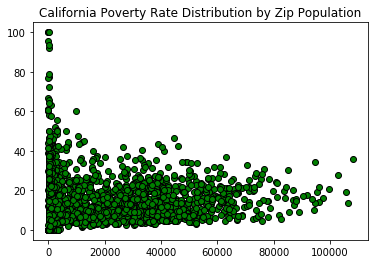

In [45]:
plt.scatter(cen_x_axis, cen_data, color="g", edgecolors="black")
plt.title('California Poverty Rate Distribution by Zip Population')

In [46]:
grouped_Zipclass_census_data = census_data[['Zipcode','ZipClass']].groupby(['ZipClass']).count()
grouped_Zipclass_census_data = grouped_Zipclass_census_data.rename(columns={'Zipcode':'Total Zips'})
grouped_Zipclass_census_data.reset_index().head()
#distribution of zip codes accross the dataset

,ZipClass,Total Zips
0,Frontier,178
1,Rural,753
2,Suburban,216
3,Urban,593


In [47]:
#Remove zero populations and NaNs
#Create bins based on poverty rate to complete an analysis for zip classifications
# Urban, Suburban, Rural, Frontier
zip_time_dist = zip_time_dist.loc[zip_time_dist['Population']>0,:]
zip_time_dist.columns
zip_time_dist = zip_time_dist[['ID', 'RowID', 'Zipcode', 'Population', 'Median Age',
       'Household Income', 'Per Capita Income', 'Poverty Count',
       'Poverty Rate', 'State', 'ZipClass', 'Latitude', 'Longitude', 'Rank',
       'Distance', 'Time']]
# zip_time_dist
zip_bins = [0,10,20,50,95]
group_names = ['<10%','10%-20%','20%-50%','50%-95%']

zip_time_dist['Poverty Ranges'] = pd.cut(zip_time_dist['Poverty Rate'], zip_bins, labels=group_names)
zip_time_dist.head(30)

zip_time_dist_mean = zip_time_dist[['Poverty Ranges','ZipClass','Distance', 'Time']]

zip_time_dist_mean = zip_time_dist_mean.groupby(['Poverty Ranges','ZipClass']).mean()

zip_time_dist_mean = zip_time_dist_mean.dropna().reset_index().sort_values('ZipClass')

#focus on frontier zips
zip_time_dist_mean_f = zip_time_dist_mean.loc[zip_time_dist_mean['ZipClass']=='Frontier',:]
zip_time_dist_mean_f


,Poverty Ranges,ZipClass,Distance,Time
0,<10%,Frontier,18.093103,19.720690
4,10%-20%,Frontier,16.437500,17.912500
8,20%-50%,Frontier,18.901563,20.603125
12,50%-95%,Frontier,19.111111,20.811111


In [48]:
#focus on rural zips
zip_time_dist_mean_r = zip_time_dist_mean.loc[zip_time_dist_mean['ZipClass']=='Rural',:]
zip_time_dist_mean_r

,Poverty Ranges,ZipClass,Distance,Time
1,<10%,Rural,4.396639,4.846639
5,10%-20%,Rural,5.285603,5.811284
9,20%-50%,Rural,5.585915,6.090141
13,50%-95%,Rural,3.620000,4.030000


# Next I created bins for poverty ranges based on poverty rate and plotted the results. In reviewing the results there doesn't appear to be worse or better access to a dentist based on the poverty rates.

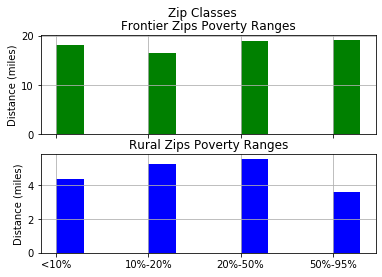

In [49]:
# Poverty ranges bin plots



fig, ax = plt.subplots(2,1, sharex=True)
fig.suptitle('Zip Classes')
#frontier per poverty range
data = zip_time_dist_mean_f['Distance']
x_axis = np.arange(len(data))

#rural per poverty range
data1 = zip_time_dist_mean_r['Distance']
x_axis1 = np.arange(len(data))

width = 8
#urban zips per capita ranges
ax[0].bar( x_axis, data, color='green', align='edge', width=0.3)

#suburban zips per capita ranges
ax[1].bar( x_axis1, data1, color='blue', align='edge', width=0.3)


ax[0].set_ylabel('Distance (miles)')
ax[0].set_title('Frontier Zips Poverty Ranges')
ax[0].set_xticks(x_axis)
ax[0].set_xticklabels(zip_time_dist_mean_f['Poverty Ranges'])
ax[0].set_autoscaley_on(True)
ax[0].grid(True)

ax[1].set_ylabel('Distance (miles)')
ax[1].set_title('Rural Zips Poverty Ranges')
ax[1].set_xticks(x_axis)
ax[1].set_xticklabels(zip_time_dist_mean_r['Poverty Ranges'])
ax[1].set_autoscaley_on(True)
ax[1].grid(True)



In [50]:
#focus on suburban zips
zip_time_dist_mean_s = zip_time_dist_mean.loc[zip_time_dist_mean['ZipClass']=='Suburban',:]
zip_time_dist_mean_s

,Poverty Ranges,ZipClass,Distance,Time
2,<10%,Suburban,0.760800,0.978400
6,10%-20%,Suburban,0.876471,1.142647
10,20%-50%,Suburban,0.945000,1.195000


In [51]:
#focus on urban zips
zip_time_dist_mean_u = zip_time_dist_mean.loc[zip_time_dist_mean['ZipClass']=='Urban',:]
zip_time_dist_mean_u = zip_time_dist_mean_u[0:3]
zip_time_dist_mean_u

,Poverty Ranges,ZipClass,Distance,Time
3,<10%,Urban,0.482234,0.937056
7,10%-20%,Urban,0.432917,0.842083
11,20%-50%,Urban,0.454795,0.888356


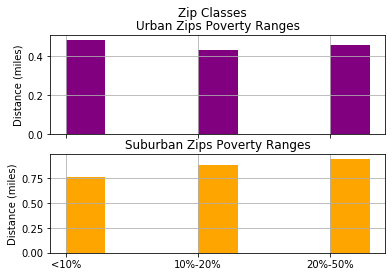

In [52]:

fig, ax = plt.subplots(2,1, sharex=True)
fig.suptitle('Zip Classes')
#urban per poverty range
data = zip_time_dist_mean_u['Distance']
x_axis = np.arange(len(data))

#suburban per poverty range
data1 = zip_time_dist_mean_s['Distance']
x_axis1 = np.arange(len(data))


width = 8
#urban zips per capita ranges
ax[0].bar( x_axis, data, color='purple', align='edge', width=0.3)

#suburban zips per capita ranges
ax[1].bar( x_axis1, data1, color='orange', align='edge', width=0.3)


ax[0].set_ylabel('Distance (miles)')
ax[0].set_title('Urban Zips Poverty Ranges')
ax[0].set_xticks(x_axis)
ax[0].set_xticklabels(zip_time_dist_mean_u['Poverty Ranges'])
ax[0].set_autoscaley_on(True)
ax[0].grid(True)

ax[1].set_ylabel('Distance (miles)')
ax[1].set_title('Suburban Zips Poverty Ranges')
ax[1].set_xticks(x_axis)
ax[1].set_xticklabels(zip_time_dist_mean_s['Poverty Ranges'])
ax[1].set_autoscaley_on(True)
ax[1].grid(True)


In [53]:
#### Remove zero populations and NaNs
#Create bins based on Per Capita Income to complete an analysis for zip classifications
# Urban, Suburban, Rural, Frontier
IPC_zip_time_dist = zip_time_dist.loc[zip_time_dist['Population']>0,:]
IPC_zip_time_dist.columns
IPC_zip_time_dist = IPC_zip_time_dist[['ID', 'RowID', 'Zipcode', 'Population', 'Median Age',
       'Household Income', 'Per Capita Income', 'Poverty Count',
       'Poverty Rate', 'State', 'ZipClass', 'Latitude', 'Longitude', 'Rank',
       'Distance', 'Time']]
# zip_time_dist
IPC_zip_bins = [0,20000,50000,100000,120000]
IPC_group_names = ["<$20000","$20001-50000","$50001-100000","$100001-120000"]

IPC_zip_time_dist['Per Capita Income Ranges'] = pd.cut(IPC_zip_time_dist['Per Capita Income'], IPC_zip_bins, labels=IPC_group_names)
IPC_zip_time_dist.head()

IPC_zip_time_dist_mean = IPC_zip_time_dist[['Per Capita Income Ranges','ZipClass','Distance', 'Time']]

IPC_zip_time_dist_mean = IPC_zip_time_dist_mean.groupby(['Per Capita Income Ranges','ZipClass']).mean()

IPC_zip_time_dist_mean = IPC_zip_time_dist_mean.dropna().reset_index().sort_values('ZipClass')
IPC_zip_time_dist_mean
#focus on frontier zips
IPC_zip_time_dist_mean_f = IPC_zip_time_dist_mean.loc[IPC_zip_time_dist_mean['ZipClass']=='Frontier',:]
IPC_zip_time_dist_mean_f


,Per Capita Income Ranges,ZipClass,Distance,Time
0,<$20000,Frontier,22.880952,24.919048
4,$20001-50000,Frontier,16.803448,18.325000
8,$50001-100000,Frontier,8.450000,9.150000
12,$100001-120000,Frontier,11.300000,12.300000


In [54]:
#focus on rural zips
IPC_zip_time_dist_mean_r = IPC_zip_time_dist_mean.loc[IPC_zip_time_dist_mean['ZipClass']=='Rural',:]
IPC_zip_time_dist_mean_r

,Per Capita Income Ranges,ZipClass,Distance,Time
1,<$20000,Rural,5.086127,5.554913
5,$20001-50000,Rural,5.573061,6.115102
9,$50001-100000,Rural,3.871622,4.336486
13,$100001-120000,Rural,9.800000,10.650000


In [55]:
#focus on suburban zips
IPC_zip_time_dist_mean_s = IPC_zip_time_dist_mean.loc[IPC_zip_time_dist_mean['ZipClass']=='Suburban',:]
IPC_zip_time_dist_mean_s

,Per Capita Income Ranges,ZipClass,Distance,Time
2,<$20000,Suburban,1.104000,1.420000
6,$20001-50000,Suburban,0.791045,1.012687
10,$50001-100000,Suburban,0.712245,0.959184
14,$100001-120000,Suburban,1.450000,1.800000


In [56]:
#focus on urban zips
IPC_zip_time_dist_mean_u = IPC_zip_time_dist_mean.loc[IPC_zip_time_dist_mean['ZipClass']=='Urban',:]
IPC_zip_time_dist_mean_u

,Per Capita Income Ranges,ZipClass,Distance,Time
3,<$20000,Urban,0.531624,1.014530
7,$20001-50000,Urban,0.444101,0.867416
11,$50001-100000,Urban,0.461062,0.898230
15,$100001-120000,Urban,0.300000,0.600000


# Next I created bins based on per capita income ranges to visualize if there was better or worse access to a dentist based on per capita income range or by zip class.

# It appears the income per capita is a driver for better access to a dentist based on mileage.

In [57]:
IPC_zip_time_dist_mean

,Per Capita Income Ranges,ZipClass,Distance,Time
0,<$20000,Frontier,22.880952,24.919048
4,$20001-50000,Frontier,16.803448,18.325000
8,$50001-100000,Frontier,8.450000,9.150000
12,$100001-120000,Frontier,11.300000,12.300000
1,<$20000,Rural,5.086127,5.554913
5,$20001-50000,Rural,5.573061,6.115102
9,$50001-100000,Rural,3.871622,4.336486
13,$100001-120000,Rural,9.800000,10.650000
2,<$20000,Suburban,1.104000,1.420000
6,$20001-50000,Suburban,0.791045,1.012687


Text(0.5, 1.0, 'Avg Distance Per Capita Income Ranges')

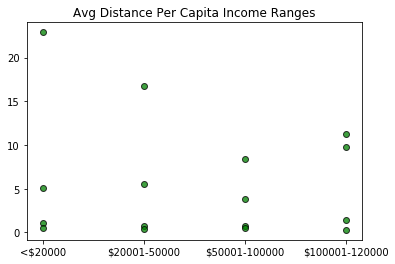

In [58]:
x_axis = IPC_zip_time_dist_mean['Per Capita Income Ranges']
x_axis
sp_data = IPC_zip_time_dist_mean['Distance']
sp_data
plt.scatter(x_axis, sp_data, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)
plt.title('Avg Distance Per Capita Income Ranges')

In [59]:

data = zip_time_dist_mean['Distance']
x_axis = zip_time_dist_mean['ZipClass']

Text(0.5, 1.0, 'Avg Distance Per Zip Class')

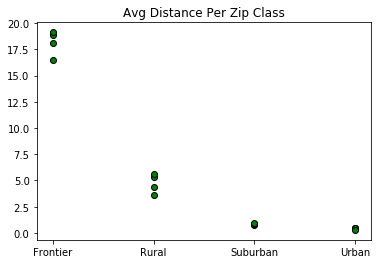

In [60]:
# Create a bar chart based upon the above data
plt.scatter(x_axis, data, color="g", edgecolors="black")
plt.title('Avg Distance Per Zip Class')

# plt.xlabel('Urban','Suburban','Rural','Frontier')

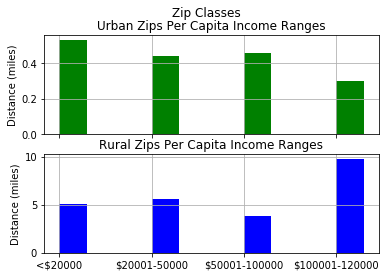

In [61]:

# Store all Relevant Percent Changes into a Tuple



fig, ax = plt.subplots(2,1, sharex=True)
fig.suptitle('Zip Classes')
#urban per capita data
data = IPC_zip_time_dist_mean_u['Distance']
x_axis = np.arange(len(data))

#rural per capita data
data1 = IPC_zip_time_dist_mean_r['Distance']
x_axis1 = np.arange(len(data))

#suburban per capita data
data2 = IPC_zip_time_dist_mean_s['Distance']
x_axis2 = np.arange(len(data))

#frontier per capita data
data3 = IPC_zip_time_dist_mean_f['Distance']
x_axis3 = np.arange(len(data))

width = 8
#urban zips per capita ranges
ax[0].bar( x_axis, data, color='green', align='edge', width=0.3)

#suburban zips per capita ranges
ax[1].bar( x_axis1, data1, color='blue', align='edge', width=0.3)

# #rural zips per capita ranges
# ax[2].bar( x_axis2, data2, color='red', align='edge', width=0.3)

# #frontier zips per capita ranges
# ax[3].bar( x_axis3, data3, color='red', align='edge', width=0.3)

# Orient widths. Add labels, tick marks, etc. 
ax[0].set_ylabel('Distance (miles)')
ax[0].set_title('Urban Zips Per Capita Income Ranges')
ax[0].set_xticks(x_axis)
ax[0].set_xticklabels(IPC_zip_time_dist_mean_u['Per Capita Income Ranges'])
ax[0].set_autoscaley_on(True)
ax[0].grid(True)

ax[1].set_ylabel('Distance (miles)')
ax[1].set_title('Rural Zips Per Capita Income Ranges')
ax[1].set_xticks(x_axis)
ax[1].set_xticklabels(IPC_zip_time_dist_mean_r['Per Capita Income Ranges'])
ax[1].set_autoscaley_on(True)
ax[1].grid(True)
# ax[0].legend(handles=UrbanZipLegend, loc='best')
# ax[0].set_ylim([150,100])
# axes.set_ylim([ymin,ymax])



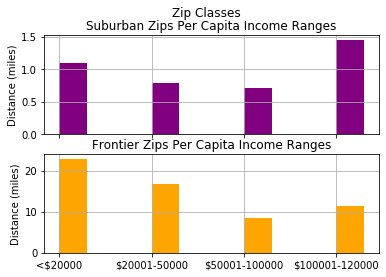

In [63]:
# Store all Relevant Percent Changes into a Tuple



fig, ax = plt.subplots(2,1, sharex=True)
fig.suptitle('Zip Classes')

#suburban per capita data
data2 = IPC_zip_time_dist_mean_s['Distance']
x_axis2 = np.arange(len(data))

#frontier per capita data
data3 = IPC_zip_time_dist_mean_f['Distance']
x_axis3 = np.arange(len(data))

width = 8
#urban zips per capita ranges
ax[0].bar( x_axis2, data2, color='purple', align='edge', width=0.3)

#suburban zips per capita ranges
ax[1].bar( x_axis3, data3, color='orange', align='edge', width=0.3)

ax[0].set_ylabel('Distance (miles)')
ax[0].set_title('Suburban Zips Per Capita Income Ranges')
ax[0].set_xticks(x_axis)
ax[0].set_xticklabels(IPC_zip_time_dist_mean_s['Per Capita Income Ranges'])
ax[0].set_autoscaley_on(True)
ax[0].grid(True)

ax[1].set_ylabel('Distance (miles)')
ax[1].set_title('Frontier Zips Per Capita Income Ranges')
ax[1].set_xticks(x_axis)
ax[1].set_xticklabels(IPC_zip_time_dist_mean_f['Per Capita Income Ranges'])
ax[1].set_autoscaley_on(True)
ax[1].grid(True)


# In conclusion I assumed the poverty rates would be a driver for better access to a dentist however there seems to be better access to a dentist for those are in a urban zip code versus a frontier zip code.